<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: Data Scientist в Segmento Екатерина Демидова

# <center>Домашнее задание 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

In [53]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Populating the interactive namespace from numpy and matplotlib


## Загрузка и знакомство с данными

Для работы вам понадобятся данные из нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). Файл **`howpop_train.csv`** уже лежит в нашем репозитории в каталоге **`data`**, но его можно скачать и с Kaggle.

In [2]:
df = pd.read_csv('../../data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [14]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/106165/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [45]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

datetime64[ns]
datetime64[ns]


,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016,
* март 2015,     X
* апрель 2015,
* апрель 2016.

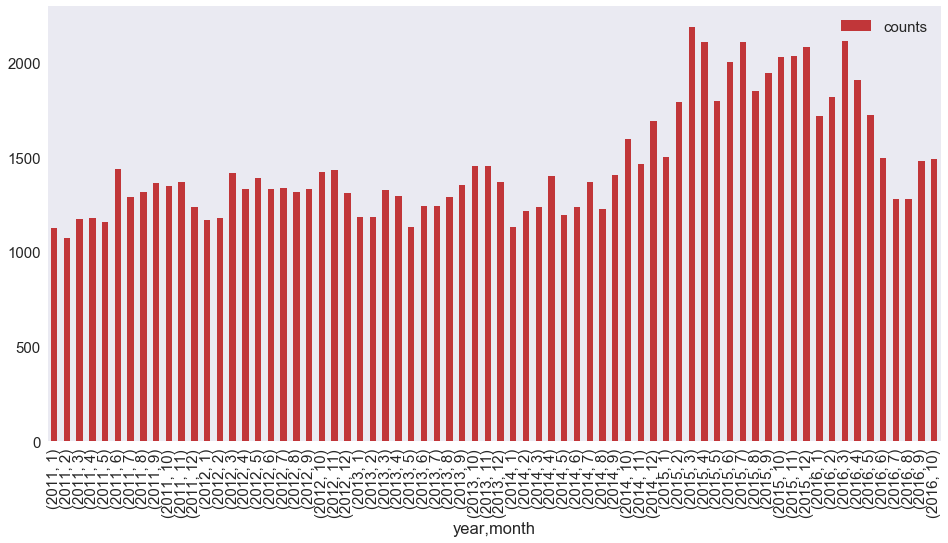

In [57]:
pd.DataFrame(df[df['year']>2010].groupby(['year', 'month']).size().rename('counts')).plot(kind="bar", rot=90, figsize=(16,8))

## 2\. Проанализируйте публикации в этом месяце (из вопроса 1)

Выберите один или несколько вариантов:

* На графике не заметны какие-либо выбросы или аномалии,               Да, не заметны
* Один или несколько дней сильно выделяются из общей картины,           Нет, не выделяется
* На хабре _всегда_ больше статей, чем на гиктаймсе,                   Да, всегда
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.    Да

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`

In [67]:
march_df = df[(df['year'] == 2015) & (df['month'] == 3)]; 
march_df.head(3).T

,97666,97667,97668
url,https://habrahabr.ru/post/251783/,https://habrahabr.ru/company/kolibrios/blog/23...,https://habrahabr.ru/post/286286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,251783,239033,286286
published,2015-03-01 00:00:00,2015-03-01 00:09:00,2015-03-01 07:13:00
author,@SLY_G,NaN,@semen_grinshtein
flow,develop,develop,misc
polling,False,False,False
content_len,49647,8581,1883
title,Введение в разработку слайд-шоу на JavaScript,Дайджест KolibriOS #7: как мы зиму перезимовали,"9 марта компания Apple сделает то, что не дела..."
comments,6,14,12


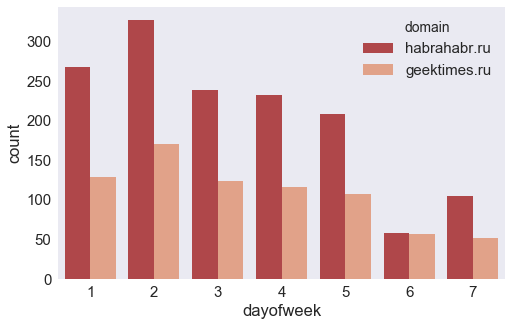

In [74]:
sns.countplot(x='dayofweek', hue='domain', data=march_df);

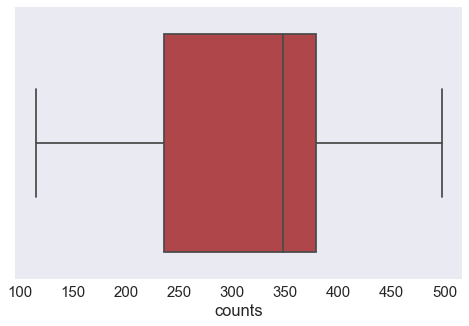

In [214]:
#выбросы?
marchcounts_df = pd.DataFrame(march_df.groupby('dayofweek').size().rename('counts'));
sns.boxplot(y="counts", data=marchcounts_df, orient="h")

## 3\. Выберите верное утверждение

* Больше всего просмотров (в среднем) набирают статьи, опубликованные в 12 часов дня;     Нет
* У опубликованных в 10 утра постов больше всего комментариев  (в среднем);             Нет
* Больше всего просмотров  (в среднем) набирают статьи, опубликованные в 6 часов утра;    Да
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;     Нет
* На хабре дневные статьи комментируют чаще  (в среднем), чем вечерние.                Нет

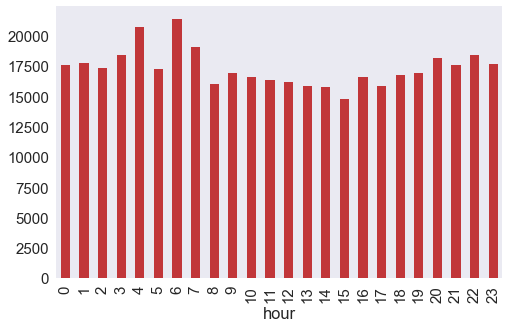

In [154]:
#среднее количество просмотров по часам
meanViewsByHour = df.groupby('hour')['views'].mean(); meanViewsByHour
df.groupby('hour')['views'].mean().plot(kind='bar')

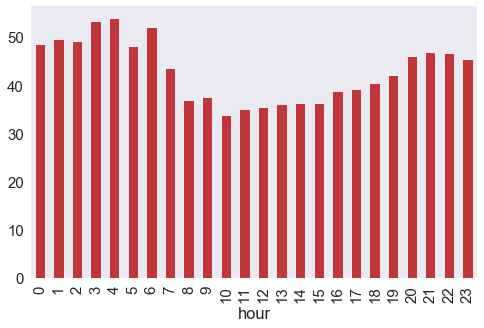

In [158]:
#среднее число каментов по часам
df.groupby('hour')['comments'].mean().plot(kind='bar')

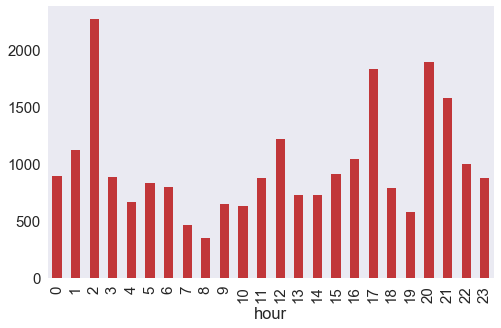

In [186]:
#максимальное число каментов по часам для гиктаймса
df[df['domain']=='geektimes.ru'].groupby('hour')['comments'].max().plot(kind='bar')

## 4\. Кого из топ-20 авторов (по числу статей) чаще всего минусуют (в среднем)?

* @Mordatyj
* @Mithgol          X
* @alizar         
* @ilya42

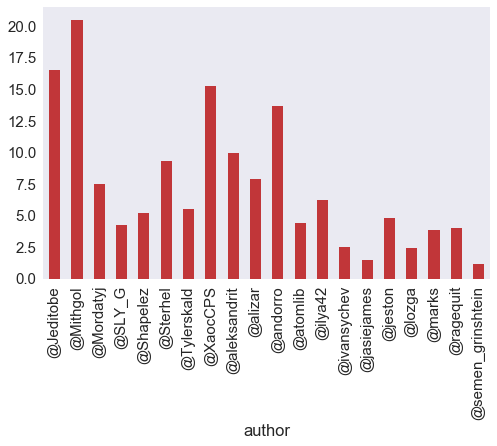

In [197]:
#топ-20 авторов по числу статей
top20authors = df.author.value_counts().sort_values(ascending = False).head(20).index.values;
#среднее кол-во минусов
meandownvotesPerAuthor = df[df.author.isin(top20authors)].groupby('author')['votes_minus'].mean(); 
meandownvotesPerAuthor.plot(kind='bar')
#fig = sns.barplot(x='author', data=meandownvotesPerAuthor);
#fig.set_xticklabels(fig.get_xticklabels(),rotation=90);


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?        Нет

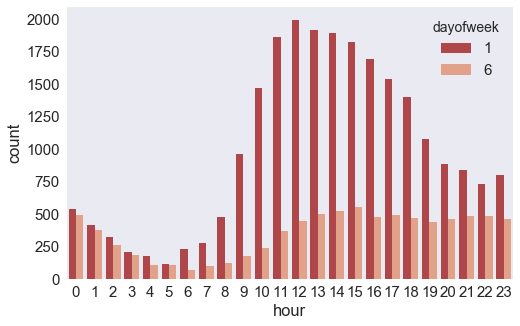

In [213]:
#кол-во статей в субботу и понедельник по часам
#df[df.dayofweek.isin([1,6])]
sns.countplot(x='hour', hue='dayofweek', data = df[df.dayofweek.isin([1,6])])